<a href="https://colab.research.google.com/github/bourasmohamedyoucefenssea/Machine_Learning_Projects/blob/main/Queensland_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# South_Wales Analysis

In [ ]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.7 MB/s eta 0:00:00
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20728 sha256=3b2a07b65a05b5df9a9f15a0277b633477e1a943e82f4731c59b4386283dfcde
  Stored in directory: /root/.cache/pip/wheels/83/43/92/44f9515471f56877c774a515a2902d3e5484ea1bc7fd412d03
Successfully built mplcursors
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense, Dropout
from keras.metrics import RootMeanSquaredError
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import mplcursors
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
!git clone https://github.com/bourasmohamedyoucefenssea/Natural-Language-Processing.git
%cd Natural-Language-Processing
data = pd.read_excel('data.xlsx')
data

Cloning into 'Natural-Language-Processing'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (23/23), 29.13 MiB | 22.38 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/Natural-Language-Processing


,date_time,demand_new_south_wales,price_new_south_wales,demande_queensland,price_queensland,demand_south_australia,price_south_australia,demand_tasmania,price_tasmania,demand_victoria,price_victoria
0,2023-01-01 00:00:00,6906.63,140.40,5718.46,139.73,1443.65,127.57,1001.74,450.10,4676.57,129.51
1,2023-01-01 00:05:00,6906.63,140.40,5718.46,139.73,1443.65,127.57,1001.74,450.10,4676.57,129.51
2,2023-01-01 00:10:00,6854.28,133.96,5721.47,136.00,1438.16,122.85,958.14,117.44,4722.43,124.72
3,2023-01-01 00:15:00,6856.32,120.00,5691.56,121.80,1433.89,111.14,957.12,105.40,4672.63,111.64
4,2023-01-01 00:20:00,6796.27,118.99,5718.89,121.61,1444.12,110.25,948.37,105.12,4616.49,110.75
...,...,...,...,...,...,...,...,...,...,...,...
105116,2023-12-31 23:40:00,6649.50,57.98,6384.64,85.55,1339.67,55.11,1052.62,85.28,4070.49,51.94
105117,2023-12-31 23:45:00,6631.86,57.98,6374.79,85.55,1296.45,54.59,1058.23,85.28,4035.14,52.23
105118,2023-12-31 23:50:00,6649.77,57.98,6386.35,85.75,1301.21,54.17,1055.42,85.28,4039.52,51.83
105119,2023-12-31 23:55:00,6634.16,57.98,6296.06,85.55,1300.49,53.75,1051.04,85.28,4036.91,51.43


In [ ]:
df = data[["date_time","price_queensland"]]
df

,date_time,price_new_south_wales
0,2023-01-01 00:00:00,140.40
1,2023-01-01 00:05:00,140.40
2,2023-01-01 00:10:00,133.96
3,2023-01-01 00:15:00,120.00
4,2023-01-01 00:20:00,118.99
...,...,...
105116,2023-12-31 23:40:00,57.98
105117,2023-12-31 23:45:00,57.98
105118,2023-12-31 23:50:00,57.98
105119,2023-12-31 23:55:00,57.98


## Hourly

In [ ]:
hourly_average_df =  df.resample('H', on='date_time').mean().reset_index()
hourly_average_df

,date_time,price_new_south_wales
0,2023-01-01 00:00:00,120.326667
1,2023-01-01 01:00:00,108.527500
2,2023-01-01 02:00:00,95.204167
3,2023-01-01 03:00:00,88.006667
4,2023-01-01 04:00:00,81.882500
...,...,...
8756,2023-12-31 20:00:00,50.100000
8757,2023-12-31 21:00:00,54.545833
8758,2023-12-31 22:00:00,55.647500
8759,2023-12-31 23:00:00,57.465000


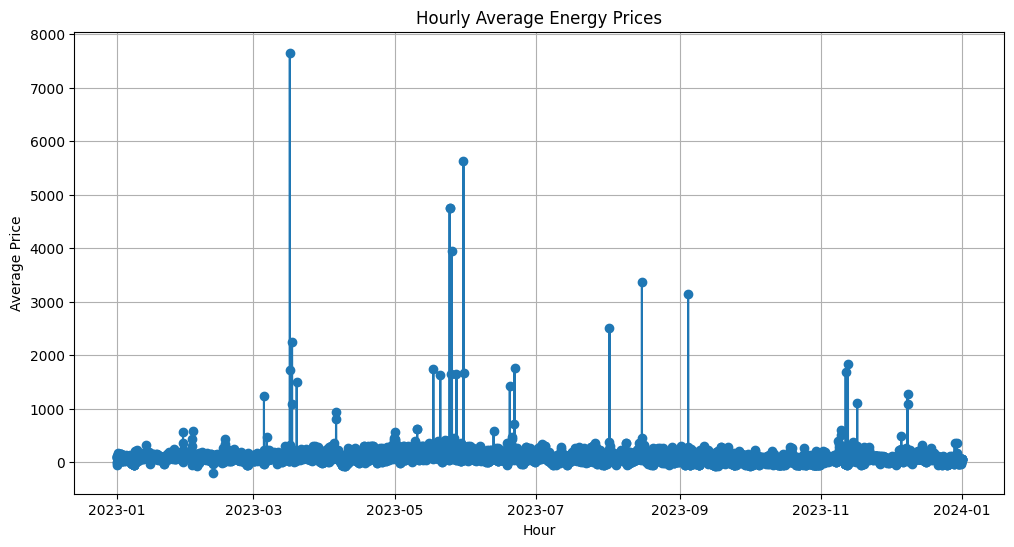

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_df['date_time'], hourly_average_df['price_new_south_wales'], marker='o', linestyle='-')
plt.title('Hourly Average Energy Prices')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.grid(True)
plt.gca().set_autoscale_on(True)
mplcursors.cursor(hover=True)
plt.show()

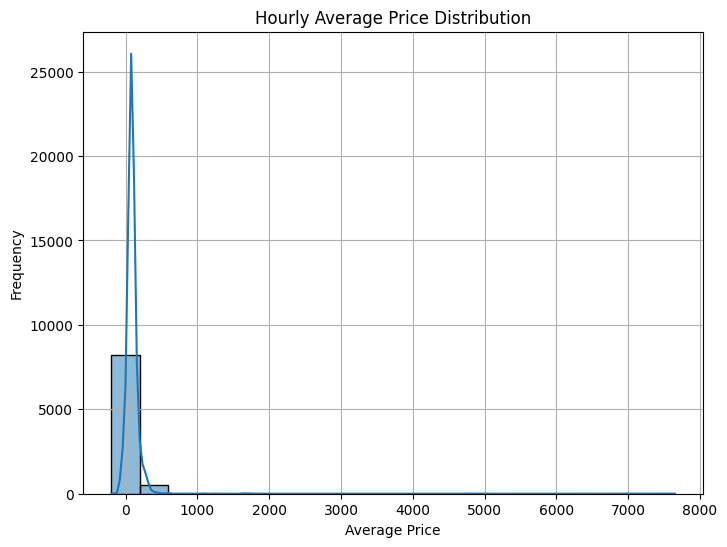

In [ ]:
# Hourly Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(hourly_average_df['price_new_south_wales'], bins=20, kde=True)
plt.title('Hourly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

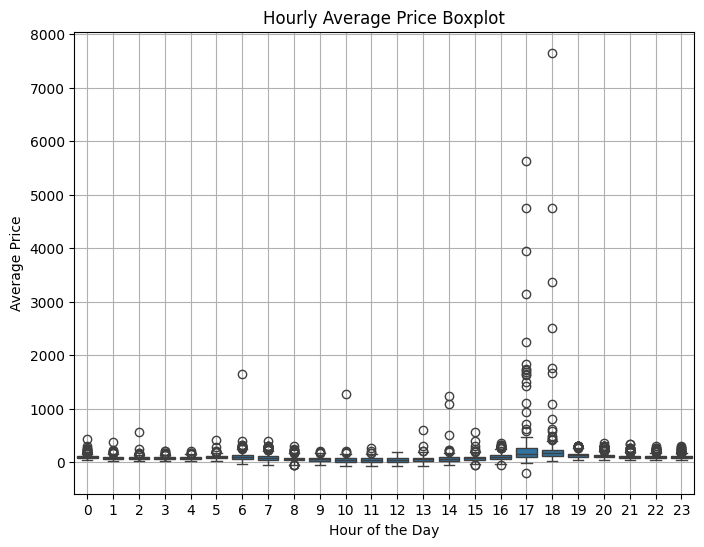

In [ ]:
# Hourly Price Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=hourly_average_df['date_time'].dt.hour, y=hourly_average_df['price_new_south_wales'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

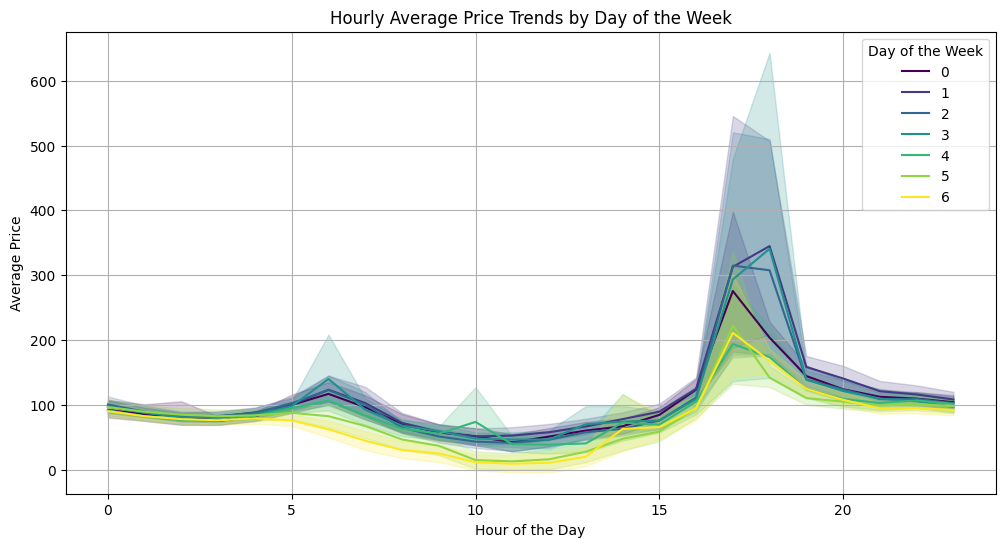

In [ ]:
# Hourly Price Trends by Day of the Week (Line Plot)
hourly_average_df['weekday'] = hourly_average_df['date_time'].dt.dayofweek
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_new_south_wales', hue='weekday', palette='viridis')
plt.title('Hourly Average Price Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

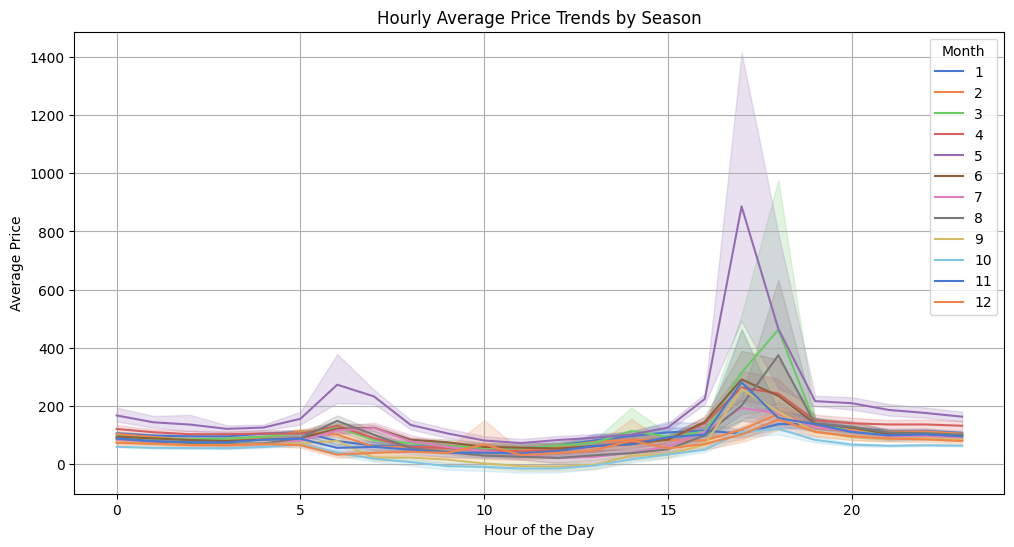

In [ ]:
# Hourly Price Trends by Season (Line Plot)
hourly_average_df['month'] = hourly_average_df['date_time'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_average_df, x=hourly_average_df['date_time'].dt.hour, y='price_new_south_wales', hue='month', palette='muted')
plt.title('Hourly Average Price Trends by Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.legend(title='Month')
plt.grid(True)
plt.show()

In [ ]:
df1 = df.copy()
data['date_time'] = pd.to_datetime(data['date_time'])
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure_seulement']=pd.to_datetime(df1['heure_seulement'], format='%H:%M').dt.time
df1['heure_seulement'] = df1['date_time'].dt.strftime('%H:%M')
df1['heure'] = df1['date_time'].dt.strftime('%H')
df1['heure'] = pd.to_numeric(df1['heure'])
observations_a_lheure_17 = df1[df1['heure']== 17]
observations_a_lheure_17

,date_time,price_new_south_wales,heure_seulement,heure
204,2023-01-01 17:00:00,108.98,17:00,17
205,2023-01-01 17:05:00,81.81,17:05,17
206,2023-01-01 17:10:00,82.64,17:10,17
207,2023-01-01 17:15:00,80.24,17:15,17
208,2023-01-01 17:20:00,81.56,17:20,17
...,...,...,...,...
105043,2023-12-31 17:35:00,-55.55,17:35,17
105044,2023-12-31 17:40:00,0.00,17:40,17
105045,2023-12-31 17:45:00,-23.01,17:45,17
105046,2023-12-31 17:50:00,36.08,17:50,17


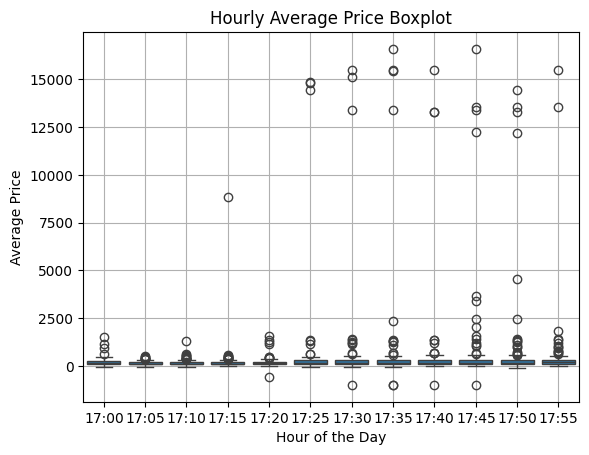

In [ ]:
sns.boxplot(x=observations_a_lheure_17['heure_seulement'], y=observations_a_lheure_17['price_new_south_wales'])
plt.title('Hourly Average Price Boxplot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

,date_time,price_new_south_wales,heure_seulement,heure
216,2023-01-01 18:00:00,150.33,18:00,18
217,2023-01-01 18:05:00,160.01,18:05,18
218,2023-01-01 18:10:00,191.25,18:10,18
219,2023-01-01 18:15:00,160.01,18:15,18
220,2023-01-01 18:20:00,160.01,18:20,18
...,...,...,...,...
105055,2023-12-31 18:35:00,36.06,18:35,18
105056,2023-12-31 18:40:00,36.06,18:40,18
105057,2023-12-31 18:45:00,36.06,18:45,18
105058,2023-12-31 18:50:00,36.08,18:50,18


In [ ]:
df2 = df.copy()
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure_seulement']=pd.to_datetime(df2['heure_seulement'], format='%H:%M').dt.time
df2['heure_seulement'] = df2['date_time'].dt.strftime('%H:%M')
df2['heure'] = df2['date_time'].dt.strftime('%H')
df2['heure'] = pd.to_numeric(df2['heure'])
observations_a_lheure_18 = df1[df2['heure']== 18]
observations_a_lheure_18

,date_time,price_new_south_wales,heure_seulement,heure
216,2023-01-01 18:00:00,150.33,18:00,18
217,2023-01-01 18:05:00,160.01,18:05,18
218,2023-01-01 18:10:00,191.25,18:10,18
219,2023-01-01 18:15:00,160.01,18:15,18
220,2023-01-01 18:20:00,160.01,18:20,18
...,...,...,...,...
105055,2023-12-31 18:35:00,36.06,18:35,18
105056,2023-12-31 18:40:00,36.06,18:40,18
105057,2023-12-31 18:45:00,36.06,18:45,18
105058,2023-12-31 18:50:00,36.08,18:50,18


## Daily

In [ ]:
daily_average_prices = df.resample('D', on='date_time').mean().reset_index()
daily_average_prices

,date_time,price_new_south_wales
0,2023-01-01,70.994201
1,2023-01-02,86.269028
2,2023-01-03,74.482222
3,2023-01-04,83.291632
4,2023-01-05,85.600417
...,...,...
361,2023-12-28,50.416632
362,2023-12-29,74.763472
363,2023-12-30,30.594514
364,2023-12-31,28.368646


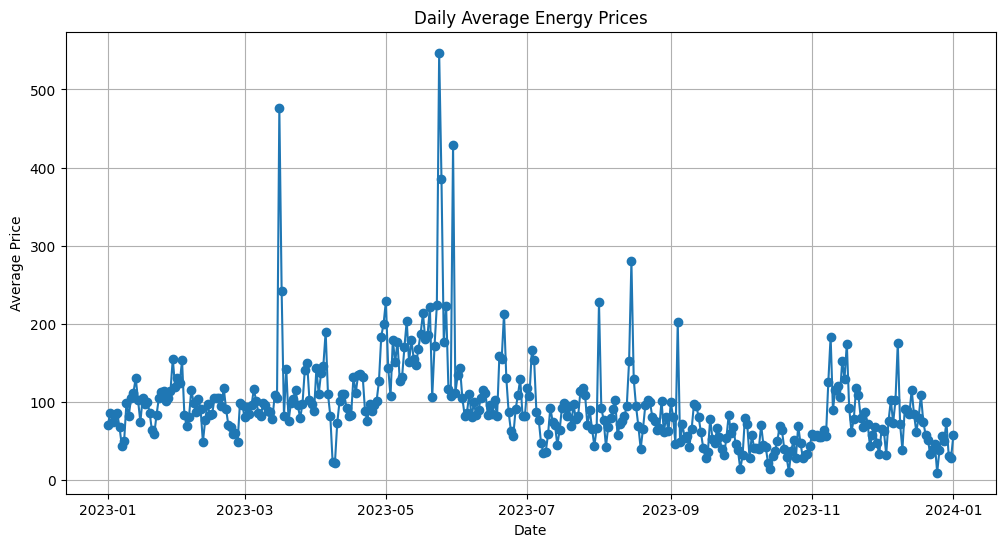

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices['date_time'], daily_average_prices['price_new_south_wales'], marker='o', linestyle='-')
plt.title('Daily Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

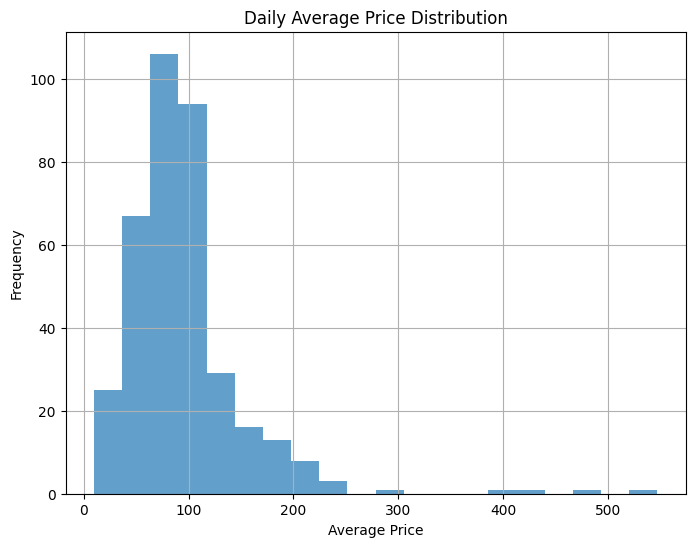

In [ ]:
# Daily Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(daily_average_prices['price_new_south_wales'], bins=20, alpha=0.7)
plt.title('Daily Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

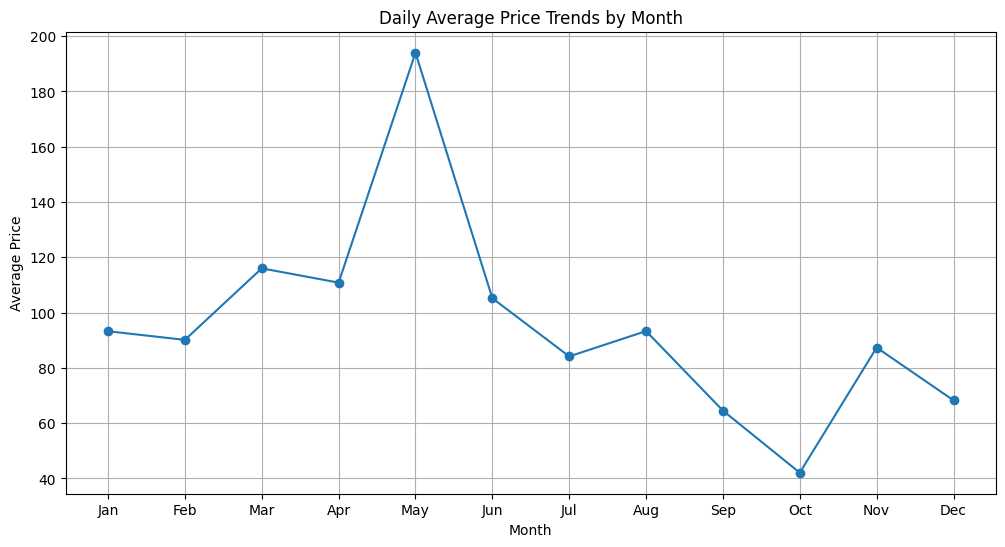

In [ ]:
# Daily Price Trends by Month
daily_average_prices['month'] = daily_average_prices['date_time'].dt.month
plt.figure(figsize=(12, 6))
plt.plot(daily_average_prices.groupby('month')['price_new_south_wales'].mean(), marker='o', linestyle='-')
plt.title('Daily Average Price Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

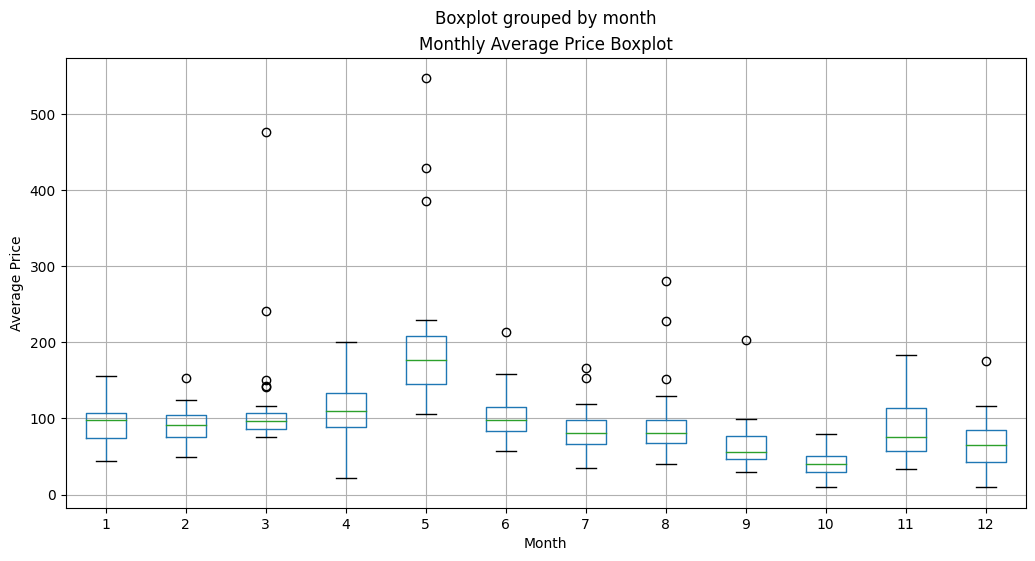

In [ ]:
# Monthly Boxplot
plt.figure(figsize=(10, 6))
daily_average_prices.boxplot(column='price_new_south_wales', by='month', figsize=(12, 6))
plt.title('Monthly Average Price Boxplot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

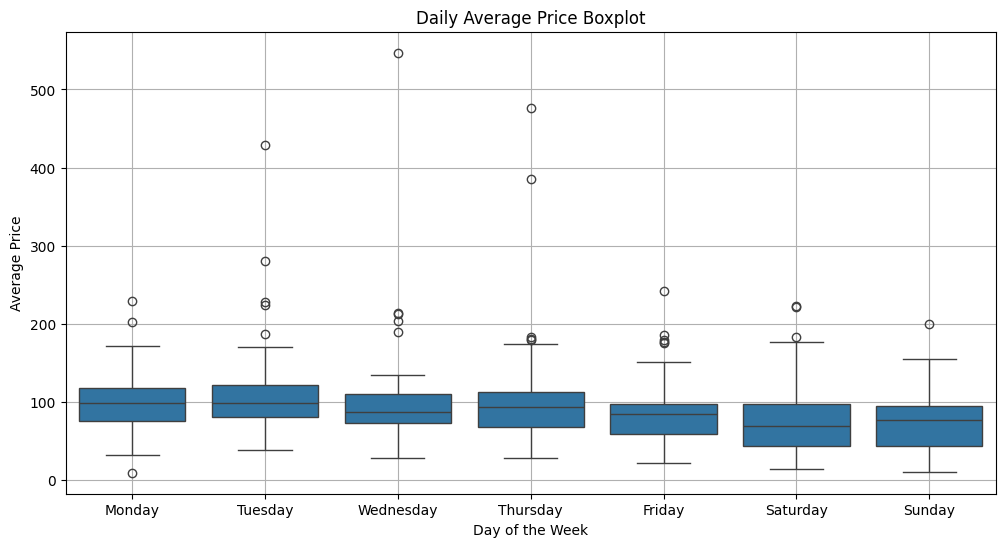

In [ ]:
daily_average_prices['day_of_week'] = daily_average_prices['date_time'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='price_new_south_wales', data=daily_average_prices, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Average Price Boxplot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

## Monthly

In [ ]:
monthly_df = df.resample('M', on='date_time').mean().reset_index()
monthly_df

,date_time,price_new_south_wales
0,2023-01-31,94.395689
1,2023-02-28,90.133947
2,2023-03-31,116.010338
3,2023-04-30,110.834674
4,2023-05-31,193.998234
5,2023-06-30,105.194963
6,2023-07-31,84.151867
7,2023-08-31,93.307366
8,2023-09-30,64.543947
9,2023-10-31,42.082014


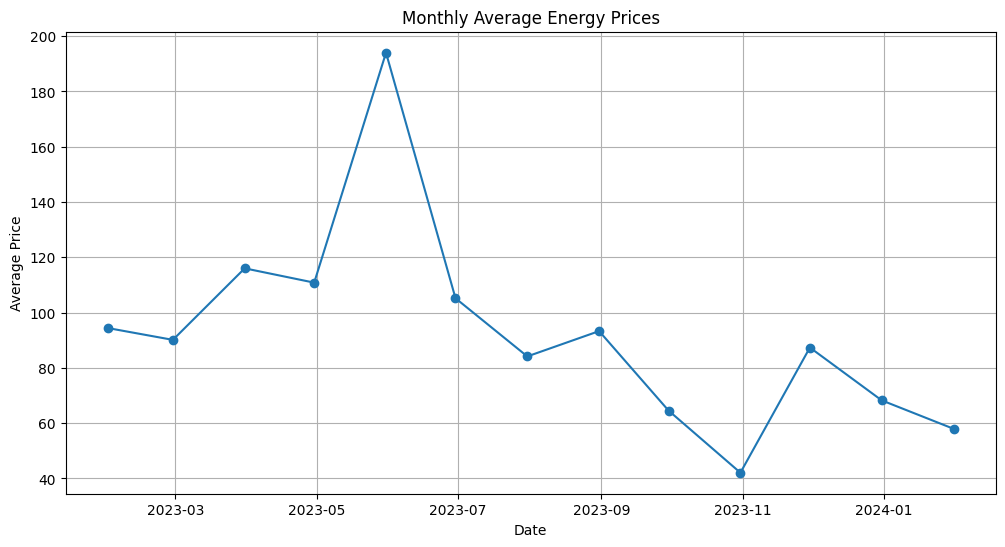

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_df['date_time'], monthly_df['price_new_south_wales'], marker='o', linestyle='-')
plt.title('Monthly Average Energy Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

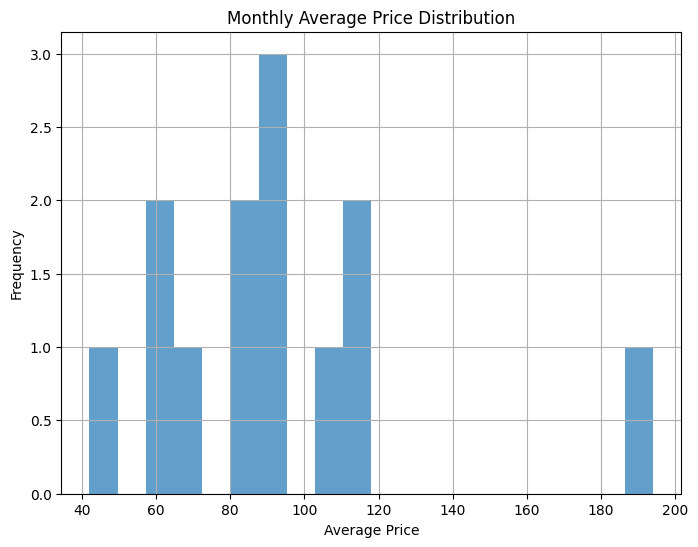

In [ ]:
# Daily Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(monthly_df['price_new_south_wales'], bins=20, alpha=0.7)
plt.title('Monthly Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Modeling phase

In [ ]:
import datetime
dataframe_excel_modified = df[:-1]
prices = dataframe_excel_modified['price_new_south_wales']
num_rows = len(prices) // 288
reshaped_prices_df = pd.DataFrame([prices[i*288:(i+1)*288].values for i in range(num_rows)])
reshaped_prices_df
reshaped_prices_df_reduced = reshaped_prices_df.iloc[:, :12]
reshaped_prices_df_reduced_without_first_row = reshaped_prices_df_reduced.iloc[1:]
reshaped_prices_df_latest_without_last_row = reshaped_prices_df.iloc[:-1]
reshaped_prices_df_latest_without_last_row.index = range(1,reshaped_prices_df_latest_without_last_row.shape[0] + 1)
combined_df = pd.concat([reshaped_prices_df_latest_without_last_row, reshaped_prices_df_reduced_without_first_row], axis=1)
time_sequence = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(288)]
column_names = ["X_" + t.strftime("%H:%M:%S") for t in time_sequence]
combined_df.columns = column_names + list(combined_df.columns[288:])
time_sequence_last_12 = [(datetime.datetime.min + datetime.timedelta(minutes=5*i)).time() for i in range(12)]
last_column_names = ["Y_" + t.strftime("%H:%M:%S") for t in time_sequence_last_12]
combined_df.columns = list(combined_df.columns[:-12]) + last_column_names
start_date = pd.Timestamp('2023-01-01')
date_index = [start_date + pd.Timedelta(days=i) for i in range(combined_df.shape[0])]
combined_df.index = date_index
combined_df.head()

,X_00:00:00,X_00:05:00,X_00:10:00,X_00:15:00,X_00:20:00,X_00:25:00,X_00:30:00,X_00:35:00,X_00:40:00,X_00:45:00,...,Y_00:10:00,Y_00:15:00,Y_00:20:00,Y_00:25:00,Y_00:30:00,Y_00:35:00,Y_00:40:00,Y_00:45:00,Y_00:50:00,Y_00:55:00
2023-01-01,140.40,140.40,133.96,120.00,118.99,118.99,107.55,118.99,117.02,109.50,...,101.69,111.50,99.65,92.60,88.33,91.33,88.74,89.37,80.02,80.02
2023-01-02,83.57,93.00,101.69,111.50,99.65,92.60,88.33,91.33,88.74,89.37,...,106.80,109.00,109.00,100.00,97.51,100.00,113.14,109.50,100.00,106.71
2023-01-03,100.00,109.50,106.80,109.00,109.00,100.00,97.51,100.00,113.14,109.50,...,109.50,109.00,89.18,89.51,86.52,90.42,89.51,89.51,89.51,89.51
2023-01-04,89.73,109.50,109.50,109.00,89.18,89.51,86.52,90.42,89.51,89.51,...,120.02,120.02,120.02,119.06,118.00,118.99,118.99,109.50,118.99,108.66
2023-01-05,108.55,120.02,120.02,120.02,120.02,119.06,118.00,118.99,118.99,109.50,...,89.51,89.51,86.52,89.00,89.00,94.35,89.00,86.52,81.02,80.03


In [ ]:
combined_df.index = pd.to_datetime(combined_df.index)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(combined_df)
data_scaled = pd.DataFrame(data_scaled, columns=combined_df.columns, index=combined_df.index)
data_scaled.head()

,X_00:00:00,X_00:05:00,X_00:10:00,X_00:15:00,X_00:20:00,X_00:25:00,X_00:30:00,X_00:35:00,X_00:40:00,X_00:45:00,...,Y_00:10:00,Y_00:15:00,Y_00:20:00,Y_00:25:00,Y_00:30:00,Y_00:35:00,Y_00:40:00,Y_00:45:00,Y_00:50:00,Y_00:55:00
2023-01-01,0.404552,0.367006,0.341517,0.285215,0.320469,0.322554,0.317225,0.320264,0.027812,0.282875,...,0.213532,0.251459,0.247860,0.223782,0.249033,0.216389,0.018140,0.207093,0.167127,0.174566
2023-01-02,0.184187,0.179083,0.213532,0.251459,0.247860,0.223782,0.249033,0.216389,0.018140,0.207093,...,0.233799,0.241531,0.282963,0.251478,0.281604,0.248948,0.026485,0.282875,0.242778,0.274720
2023-01-03,0.247896,0.244499,0.233799,0.241531,0.282963,0.251478,0.281604,0.248948,0.026485,0.282875,...,0.244507,0.241531,0.208552,0.212216,0.242611,0.212971,0.018403,0.207620,0.203059,0.210177
2023-01-04,0.208073,0.244499,0.244507,0.241531,0.208552,0.212216,0.242611,0.212971,0.018403,0.207620,...,0.286230,0.285294,0.324335,0.322816,0.354302,0.320264,0.028485,0.282875,0.314679,0.282037
2023-01-05,0.281050,0.286207,0.286230,0.285294,0.324335,0.322816,0.354302,0.320264,0.028485,0.282875,...,0.165226,0.164132,0.198566,0.210308,0.251410,0.227730,0.018229,0.196363,0.170914,0.174603


In [ ]:
x_columns = [col for col in data_scaled.columns if col.startswith('X_')]
y_columns = [col for col in data_scaled.columns if col.startswith('Y_')]
X = data_scaled[x_columns]
Y = data_scaled[y_columns]
correlation_matrix = X.corrwith(Y, axis=0)
correlation_results = pd.DataFrame(index=x_columns, columns=y_columns)
for x_col in x_columns:
    for y_col in y_columns:
        correlation = X[x_col].corr(Y[y_col])
        correlation_results.loc[x_col, y_col] = correlation
correlation_results.head()

,Y_00:00:00,Y_00:05:00,Y_00:10:00,Y_00:15:00,Y_00:20:00,Y_00:25:00,Y_00:30:00,Y_00:35:00,Y_00:40:00,Y_00:45:00,Y_00:50:00,Y_00:55:00
X_00:00:00,0.611561,0.627875,0.617593,0.592347,0.607284,0.614877,0.628982,0.598278,0.463262,0.599572,0.602662,0.630483
X_00:05:00,0.586361,0.578773,0.582515,0.557207,0.590382,0.576093,0.590444,0.569054,0.371718,0.569407,0.579002,0.623796
X_00:10:00,0.627025,0.622403,0.637653,0.598351,0.637896,0.616451,0.632114,0.594097,0.365586,0.607858,0.611799,0.658122
X_00:15:00,0.62283,0.634779,0.647665,0.615159,0.652262,0.625627,0.637896,0.599342,0.358349,0.621531,0.615512,0.658742
X_00:20:00,0.640882,0.649432,0.659583,0.625517,0.657055,0.646238,0.665099,0.620415,0.411324,0.630613,0.626123,0.671498


###Modeling with scaled data

In [ ]:
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X')
y= data_scaled.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/50
203/203 [==============================] - 20s 24ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - mean_absolute_error: 0.0826 - root_mean_squared_error: 0.1282 - r2_score: -0.3399 - val_loss: 0.0061 - val_mean_squared_error: 0.0061 - val_mean_absolute_error: 0.0524 - val_root_mean_squared_error: 0.0783 - val_r2_score: 0.5128
Epoch 2/50
203/203 [==============================] - 3s 13ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - mean_absolute_error: 0.0802 - root_mean_squared_error: 0.1261 - r2_score: -0.3388 - val_loss: 0.0095 - val_mean_squared_error: 0.0095 - val_mean_absolute_error: 0.0663 - val_root_mean_squared_error: 0.0975 - val_r2_score: 0.3505
Epoch 3/50
203/203 [==============================] - 2s 12ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - mean_absolute_error: 0.0677 - root_mean_squared_error: 0.1065 - r2_score: 0.1370 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0611 - val_root_mean_squared_error: 0.09

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled.filter(regex='^X').columns
Y_columns = data_scaled.filter(regex='^Y').columns
X= data_scaled.filter(regex='^X').values
y= data_scaled.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/30
13/13 [==============================] - 21s 1s/step - loss: 0.0440 - mean_squared_error: 0.0440 - mean_absolute_error: 0.1547 - root_mean_squared_error: 0.2099 - r2_score: -2.0317 - val_loss: 0.0166 - val_mean_squared_error: 0.0166 - val_mean_absolute_error: 0.0900 - val_root_mean_squared_error: 0.1290 - val_r2_score: -1.3317
Epoch 2/30
13/13 [==============================] - 12s 946ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - mean_absolute_error: 0.1032 - root_mean_squared_error: 0.1522 - r2_score: -4.1127 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0651 - val_root_mean_squared_error: 0.0970 - val_r2_score: 0.2386
Epoch 3/30
13/13 [==============================] - 12s 940ms/step - loss: 0.0155 - mean_squared_error: 0.0155 - mean_absolute_error: 0.0859 - root_mean_squared_error: 0.1246 - r2_score: -2.0624 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_mean_absolute_error: 0.0541 - val_root_mean_squared_error: 0.0809

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df.filter(regex='^X')
Y = combined_df.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, 288, 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

Epoch 1/100
8/8 - 4s - loss: 0.0366 - val_loss: 0.0087 - 4s/epoch - 528ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0101 - val_loss: 0.0053 - 86ms/epoch - 11ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0081 - val_loss: 0.0036 - 91ms/epoch - 11ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0069 - val_loss: 0.0036 - 92ms/epoch - 12ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0056 - val_loss: 0.0032 - 106ms/epoch - 13ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0050 - val_loss: 0.0034 - 100ms/epoch - 12ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0046 - val_loss: 0.0035 - 101ms/epoch - 13ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0043 - val_loss: 0.0039 - 109ms/epoch - 14ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0048 - val_loss: 0.0047 - 113ms/epoch - 14ms/step
Epoch 10/100
8/8 - 0s - loss: 0.0044 - val_loss: 0.0038 - 92ms/epoch - 12ms/step
Epoch 11/100
8/8 - 0s - loss: 0.0036 - val_loss: 0.0040 - 93ms/epoch - 12ms/step
Epoch 12/100
8/8 - 0s - loss: 0.0036 - val_loss: 0.0042 - 103ms/epoch - 13ms/step
Epoch 13/100
8/8 - 0s - loss: 0.

## Modeling with new scaled data: remove uncorrelated X's

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.35), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

['X_00:40:00',
 'X_01:25:00',
 'X_02:10:00',
 'X_02:45:00',
 'X_05:10:00',
 'X_05:40:00',
 'X_05:45:00',
 'X_05:50:00',
 'X_06:50:00',
 'X_06:55:00',
 'X_10:05:00',
 'X_13:10:00',
 'X_14:35:00',
 'X_14:40:00',
 'X_14:50:00',
 'X_15:10:00',
 'X_17:20:00',
 'X_17:25:00',
 'X_17:30:00',
 'X_17:35:00',
 'X_17:40:00',
 'X_17:45:00',
 'X_17:50:00',
 'X_17:55:00',
 'X_18:00:00',
 'X_18:05:00',
 'X_18:10:00',
 'X_18:15:00',
 'X_18:20:00',
 'X_18:25:00',
 'X_18:30:00',
 'X_18:35:00',
 'X_18:45:00',
 'X_18:50:00']

In [ ]:
# Drop columns with low correlations
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

,X_00:00:00,X_00:05:00,X_00:10:00,X_00:15:00,X_00:20:00,X_00:25:00,X_00:30:00,X_00:35:00,X_00:45:00,X_00:50:00,...,Y_00:10:00,Y_00:15:00,Y_00:20:00,Y_00:25:00,Y_00:30:00,Y_00:35:00,Y_00:40:00,Y_00:45:00,Y_00:50:00,Y_00:55:00
2023-01-01,0.404552,0.367006,0.341517,0.285215,0.320469,0.322554,0.317225,0.320264,0.282875,0.281095,...,0.213532,0.251459,0.247860,0.223782,0.249033,0.216389,0.018140,0.207093,0.167127,0.174566
2023-01-02,0.184187,0.179083,0.213532,0.251459,0.247860,0.223782,0.249033,0.216389,0.207093,0.167127,...,0.233799,0.241531,0.282963,0.251478,0.281604,0.248948,0.026485,0.282875,0.242778,0.274720
2023-01-03,0.247896,0.244499,0.233799,0.241531,0.282963,0.251478,0.281604,0.248948,0.282875,0.242778,...,0.244507,0.241531,0.208552,0.212216,0.242611,0.212971,0.018403,0.207620,0.203059,0.210177
2023-01-04,0.208073,0.244499,0.244507,0.241531,0.208552,0.212216,0.242611,0.212971,0.207620,0.203059,...,0.286230,0.285294,0.324335,0.322816,0.354302,0.320264,0.028485,0.282875,0.314679,0.282037
2023-01-05,0.281050,0.286207,0.286230,0.285294,0.324335,0.322816,0.354302,0.320264,0.282875,0.314679,...,0.165226,0.164132,0.198566,0.210308,0.251410,0.227730,0.018229,0.196363,0.170914,0.174603


In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=35, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/35
203/203 [==============================] - 12s 20ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - mean_absolute_error: 0.0833 - root_mean_squared_error: 0.1283 - r2_score: -0.6428 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_mean_absolute_error: 0.0729 - val_root_mean_squared_error: 0.1022 - val_r2_score: 0.3421
Epoch 2/35
203/203 [==============================] - 3s 13ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - mean_absolute_error: 0.0762 - root_mean_squared_error: 0.1099 - r2_score: -0.0350 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0560 - val_root_mean_squared_error: 0.0860 - val_r2_score: 0.0561
Epoch 3/35
203/203 [==============================] - 3s 15ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - mean_absolute_error: 0.0737 - root_mean_squared_error: 0.1145 - r2_score: 0.0695 - val_loss: 0.0044 - val_mean_squared_error: 0.0044 - val_mean_absolute_error: 0.0446 - val_root_mean_squared_error: 0.06

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 16)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

Epoch 1/30
13/13 [==============================] - 23s 1s/step - loss: 0.0431 - mean_squared_error: 0.0431 - mean_absolute_error: 0.1481 - root_mean_squared_error: 0.2077 - r2_score: -1.9495 - val_loss: 0.0108 - val_mean_squared_error: 0.0108 - val_mean_absolute_error: 0.0772 - val_root_mean_squared_error: 0.1038 - val_r2_score: -0.3415
Epoch 2/30
13/13 [==============================] - 11s 820ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0965 - root_mean_squared_error: 0.1350 - r2_score: -2.6674 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0593 - val_root_mean_squared_error: 0.0859 - val_r2_score: 0.0593
Epoch 3/30
13/13 [==============================] - 10s 811ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - mean_absolute_error: 0.0809 - root_mean_squared_error: 0.1196 - r2_score: -2.0249 - val_loss: 0.0051 - val_mean_squared_error: 0.0051 - val_mean_absolute_error: 0.0482 - val_root_mean_squared_error: 0.0713

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))  # Adjust the shape based on your dataset
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)  # Adjust based on your output requirements
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')  # Choose loss based on your problem
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

## Modeling with new scaled data: select the high correlated variables

In [ ]:
low_correlation = correlation_results.apply(lambda x:all(abs(x)< 0.90 ), axis = 1)
low_correlation_idx = low_correlation[low_correlation].index.tolist()
low_correlation_idx

In [ ]:
combined_df_filtered = combined_df.drop(columns=low_correlation_idx)
data_scaled_filtered = data_scaled.drop(columns=low_correlation_idx)
data_scaled_filtered.head()

,X_23:30:00,X_23:45:00,X_23:50:00,X_23:55:00,Y_00:00:00,Y_00:05:00,Y_00:10:00,Y_00:15:00,Y_00:20:00,Y_00:25:00,Y_00:30:00,Y_00:35:00,Y_00:40:00,Y_00:45:00,Y_00:50:00,Y_00:55:00
2023-01-01,0.269768,0.222937,0.202455,0.169755,0.184187,0.179083,0.213532,0.251459,0.247860,0.223782,0.249033,0.216389,0.018140,0.207093,0.167127,0.174566
2023-01-02,0.276361,0.277498,0.242204,0.242204,0.247896,0.244499,0.233799,0.241531,0.282963,0.251478,0.281604,0.248948,0.026485,0.282875,0.242778,0.274720
2023-01-03,0.202516,0.209496,0.278201,0.276306,0.208073,0.244499,0.244507,0.241531,0.208552,0.212216,0.242611,0.212971,0.018403,0.207620,0.203059,0.210177
2023-01-04,0.278256,0.278747,0.267970,0.248570,0.281050,0.286207,0.286230,0.285294,0.324335,0.322816,0.354302,0.320264,0.028485,0.282875,0.314679,0.282037
2023-01-05,0.216497,0.201128,0.200523,0.191126,0.205243,0.181105,0.165226,0.164132,0.198566,0.210308,0.251410,0.227730,0.018229,0.196363,0.170914,0.174603


In [ ]:
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X')
y= data_scaled_filtered.filter(regex='^Y')
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM( 128, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(len(Y_columns)))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=50, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")
test_loss = model1.evaluate(X_test, y_test, verbose=2)

Epoch 1/50
203/203 [==============================] - 12s 21ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - mean_absolute_error: 0.0819 - root_mean_squared_error: 0.1243 - r2_score: 0.0474 - val_loss: 0.0052 - val_mean_squared_error: 0.0052 - val_mean_absolute_error: 0.0452 - val_root_mean_squared_error: 0.0719 - val_r2_score: 0.6124
Epoch 2/50
203/203 [==============================] - 3s 13ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0547 - root_mean_squared_error: 0.0856 - r2_score: 0.2667 - val_loss: 0.0053 - val_mean_squared_error: 0.0053 - val_mean_absolute_error: 0.0499 - val_root_mean_squared_error: 0.0726 - val_r2_score: 0.6425
Epoch 3/50
203/203 [==============================] - 3s 12ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0687 - root_mean_squared_error: 0.1212 - r2_score: 0.1497 - val_loss: 0.0039 - val_mean_squared_error: 0.0039 - val_mean_absolute_error: 0.0420 - val_root_mean_squared_error: 0.0624

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout
from tensorflow.keras.models import Sequential
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(GRU( 32, activation='relu')))
model1.add(Dropout(0.3))
model1.add(Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ModelCheckpoint('meilleur_modele.h5', verbose=1, save_best_only=True)]
model1.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
X = combined_df_filtered.filter(regex='^X')
Y = combined_df_filtered.filter(regex='^Y')
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(50, activation='relu')),  # Change LSTM to Bidirectional LSTM
    Dense(100, activation='relu'),
    Dense(12)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
predictions = model.predict(X_test_reshaped)
test_loss = model.evaluate(X_test_reshaped, Y_test, verbose=2)
print(f'Test Loss: {test_loss}')
predictions_inv = scaler_Y.inverse_transform(predictions)
Y_test_inv = scaler_Y.inverse_transform(Y_test)
rmse = np.sqrt(mean_squared_error(Y_test_inv, predictions_inv))
print(f'Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(Y_test_inv, predictions_inv)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, Dot, Concatenate, Softmax
from tensorflow.keras import backend as K
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = Dot(axes=[2, 2])([query, key])
    attention = Activation('softmax')(attention)
    context_vector = Dot(axes=[2, 1])([attention, value])
    return context_vector
input_layer = Input(shape=(None, filtered_df_normalized.shape[1]-1))  # Adjust the shape based on your dataset
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention_out = attention_layer(lstm_out, units=64)
concat_layer = Concatenate(axis=-1)([lstm_out, attention_out])
dense_out = TimeDistributed(Dense(1))(concat_layer)  # Adjust based on your output requirements
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse')  # Choose loss based on your problem
model.summary()

In [ ]:
from tensorflow.keras.layers import Input, Dense, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf
X_columns = data_scaled_filtered.filter(regex='^X').columns
Y_columns = data_scaled_filtered.filter(regex='^Y').columns
X= data_scaled_filtered.filter(regex='^X').values
y= data_scaled_filtered.filter(regex='^Y').values
n_features = len(X_columns)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
def attention_layer(inputs, units):
    query = Dense(units)(inputs)
    key = Dense(units)(inputs)
    value = Dense(units)(inputs)
    attention = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(attention)
    context_vector = tf.matmul(attention, value)
    context_vector = Flatten()(context_vector)
    return context_vector
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
max_pool1 = MaxPooling1D(pool_size=2)(conv1)
bi_gru1 = Bidirectional(GRU(128, return_sequences=True, activation='relu'))(max_pool1)
dropout1 = Dropout(0.3)(bi_gru1)
bi_gru2 = Bidirectional(GRU(32, return_sequences=True, activation='relu'))(dropout1)  # Keep return_sequences=True for attention
attention_out = attention_layer(bi_gru2, units=32)
dropout2 = Dropout(0.3)(attention_out)
dense_out = Dense(y_train.shape[1])(dropout2)
model = Model(inputs=input_layer, outputs=dense_out)
model.compile(optimizer='adam', loss='mse', metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), RootMeanSquaredError(), tf.metrics.R2Score()])
model.fit(X_train, y_train, epochs=5, validation_split=0.3, batch_size = 1)
loss, mse, mae, rmse, r2_score = model1.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2 Score: {r2_score}")

## Modeling with new scaled data: select the high correlated variables and add them squared

## scaled data with the SIN_COS